<a href="https://colab.research.google.com/github/Fndong/ASTRO1221/blob/main/Exoplanet_Transit_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np # import the nessicary functions for the code
import astropy.units as u
import astropy.constants as ac
import matplotlib.pyplot as plt

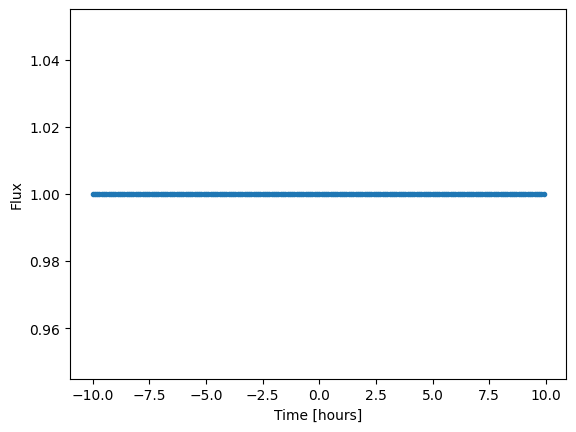

In [3]:
time_arr = np.arange(-10, 10, 0.1) * u.hour # array of time values
flux_arr = np.zeros(np.shape(time_arr)) + 1.0 # array of the flux
plt.plot(time_arr, flux_arr, linestyle="--", marker=".") #plot the time by the fluxuation
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.show()

In [4]:
tau = 2.0 * u.hour # 2 times the hour to create a refrence
t_0 = 1.0 * u.hour
time_start = t_0 - tau / 2 #starting time is equal to t of 0 minus tau over 2 to split up the graph ( tau/2 = 1 )
time_end = t_0 + tau / 2  # ending time is equal to t of 0 plus tau over to to create the opposite of the start time ( tau/2 = 1 )
print(time_start, time_end) # time start and time end refrece the starting time of the dimming light and the end of the dimming light
print(tau)

0.0 h 2.0 h
2.0 h


In [5]:
for i in range(len(time_arr)):
    if i < 10:
      print("index =", i, "value = ", time_arr[i]) #printing the corresponding x and y values


index = 0 value =  -10.0 h
index = 1 value =  -9.9 h
index = 2 value =  -9.8 h
index = 3 value =  -9.700000000000001 h
index = 4 value =  -9.600000000000001 h
index = 5 value =  -9.500000000000002 h
index = 6 value =  -9.400000000000002 h
index = 7 value =  -9.300000000000002 h
index = 8 value =  -9.200000000000003 h
index = 9 value =  -9.100000000000003 h


In [6]:
def generate_transit_lightcurve(time_arr, t_0, tau, delta): # defining a function for visualising the transit light curve
  flux_arr = np.zeros(np.shape(time_arr)) + 1.0
  time_start = t_0 - tau / 2
  time_end = t_0 + tau / 2
  ind = np.where((time_arr >= time_start) & (time_arr <= time_end))
  flux_arr[ind] = 1.0 - delta
  return flux_arr

In [38]:
time_arr = np.arange(-10, 10, 0.1) * u.hour # setting values to be plotted with the flux (before the data is added)
tau = 4.0 * u.hour
t_0 = 2.0 * u.hour
delta = 0.99

flux_arr = generate_transit_lightcurve(time_arr, t_0, tau, delta)

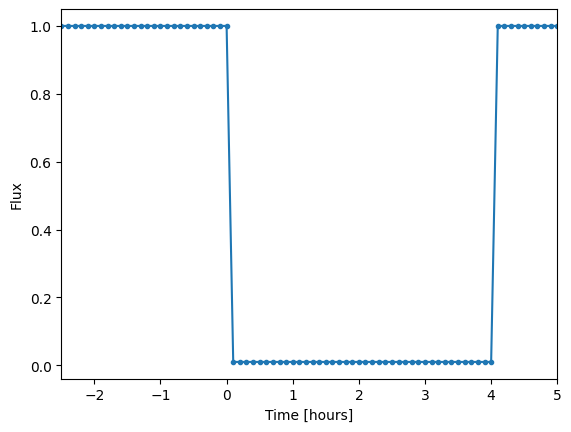

In [39]:
plt.plot(time_arr, flux_arr, linestyle="-", marker=".") #plotting with the flux
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.xlim(-2.5, 5.0)
# plt.ylim(0, 0.02)
plt.show()

In [9]:
from google.colab import files #importing the data from Nasa Exoplanet Archive
uploaded = files.upload()

Saving gj436b.tbl to gj436b.tbl


In [10]:
import astropy.io.ascii
dat = astropy.io.ascii.read("gj436b.tbl") #fuctions to make the code "read" the data

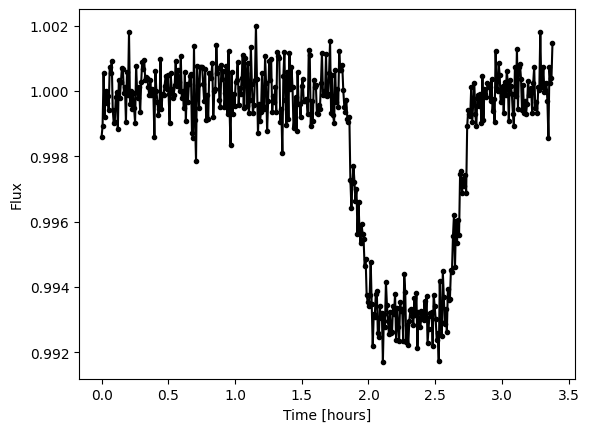

In [11]:
time_obs = dat["HJD"] #indexing the right data
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour #converting the time
flux_obs = dat["Relative_Flux"] #indexing the flux of the data
plt.plot(time_obs, flux_obs, marker=".", color="black")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")

plt.show() # plotting the data from the exoplanet archive

In [34]:
t_0 = 2.3 * u.hour #time (width) value of the fitted marker
tau = 0.9 * u.hour # position value of the fitted marker
delta = 0.008
flux_model = generate_transit_lightcurve(time_obs, t_0, tau, delta)


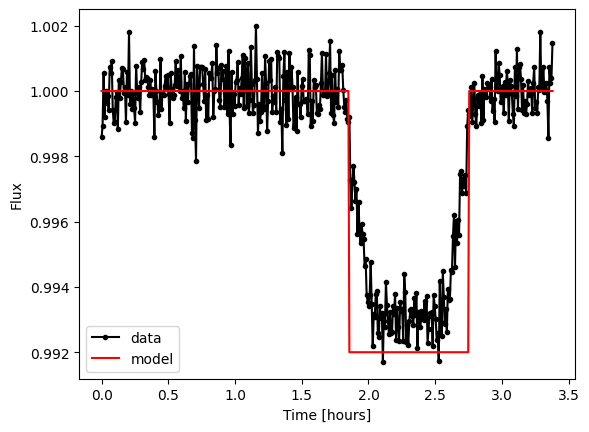

In [35]:
time_obs = dat["HJD"]
time_obs = (time_obs - time_obs[0]) * 24.0 * u.hour
flux_obs = dat["Relative_Flux"]
plt.plot(time_obs, flux_obs, marker=".", color="black", label="data")
plt.plot(time_obs, flux_model, linestyle="-", color="red", label="model")
plt.xlabel("Time [hours]")
plt.ylabel("Flux")
plt.legend()

plt.show() # plotting the fitted marker against the data : changed the time and tau to 2.3 and 0.9 hours